<a href="https://colab.research.google.com/github/HemaRavi94/Customer-Segmentation/blob/main/e_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libaries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
cust = pd.read_excel('cust_data.xlsx')
cust.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [ ]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [ ]:
cust.dtypes.value_counts()

int64     37
object     1
dtype: int64

In [ ]:
cust.shape

(30000, 38)

In [ ]:
cust.drop(columns = ['Cust_ID'], inplace = True)

#Checking missing values

In [ ]:
def missingValues(data):
    m=data.isnull().sum()
    md=(data.isnull().sum()/ data.shape[0]*100)
    df=pd.concat([m, md], axis=1, keys=["Missing", "Percentage"])
    fg=df.sort_values(by ="Percentage", ascending=False)
    fg1=fg[fg["Percentage"]>0]
    return fg1

In [ ]:
missingValues(cust)


,Missing,Percentage
Gender,2724,9.08


In [ ]:
cust['Gender'].unique()

array(['M', 'F', nan], dtype=object)

In [ ]:
cust['Gender'].value_counts()

F    22054
M     5222
Name: Gender, dtype: int64

In [ ]:
cust['Gender'].fillna('Other', inplace = True)

#Creation of dummy

In [ ]:
cust1 = pd.get_dummies(cust, drop_first=True)

In [ ]:
cust1.columns

Index(['Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft', 'Gender_M',
       'Gender_Other'],
      dtype='object')

# Checking outliers

In [ ]:
cust1.describe(percentiles = [0.01,0.02,0.03,0.04,0.05,0.25,0.5,0.75,0.95,0.96,0.97,0.98,0.99]).T


,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,95%,96%,97%,98%,99%,max
Orders,30000.0,4.169800,3.590311,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,7.0,10.0,10.0,11.0,11.00,12.0,12.0
Jordan,30000.0,0.267433,0.804778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,3.00,4.0,24.0
Gatorade,30000.0,0.252333,0.705368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.00,3.0,15.0
Samsung,30000.0,0.222933,0.917494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,3.00,5.0,27.0
Asus,30000.0,0.161333,0.740038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.00,4.0,17.0
Udis,30000.0,0.143533,0.641258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.00,3.0,14.0
Mondelez International,30000.0,0.139767,0.525840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.00,2.0,31.0
Wrangler,30000.0,0.106933,0.515921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.00,3.0,9.0
Vans,30000.0,0.111433,0.547990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.00,2.0,16.0
Fila,30000.0,0.094267,0.531592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.00,3.0,15.0


In [ ]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    return x


In [ ]:
cust2 = cust1.apply(lambda x : outlier_capping(x))

In [ ]:
cust2.shape

(30000, 38)

In [ ]:
cust2.columns

Index(['Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft', 'Gender_M',
       'Gender_Other'],
      dtype='object')

In [ ]:
x = ['Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft']
cust3 = cust2[x]


In [ ]:
def myKmeans(data,k, gap, verbose=True, grp=True):
    wcss=[]
    cluster=[]
    for i in range(1,k+1, gap):
        cluster.append(i)
        km=KMeans(n_clusters=i)
        km_result=km.fit(data)
        intr=km_result.inertia_
        wcss.append(intr)
        if verbose:
            print(f"for cluster {i} ; WCSS = {round(intr, 2)}")
    if grp:
        plt.plot(cluster, wcss, label="within cluster sum of sqaure(wcss)")
        plt.xlabel("Clusters")
        plt.ylabel("Wcss")
        plt.legend()
        plt.show()
    return wcss, cluster


for cluster 1 ; WCSS = 716374.75
for cluster 2 ; WCSS = 414472.15
for cluster 3 ; WCSS = 366150.81
for cluster 4 ; WCSS = 349574.4
for cluster 5 ; WCSS = 335345.74
for cluster 6 ; WCSS = 327021.5
for cluster 7 ; WCSS = 319721.73
for cluster 8 ; WCSS = 312949.27
for cluster 9 ; WCSS = 306780.46
for cluster 10 ; WCSS = 302164.83


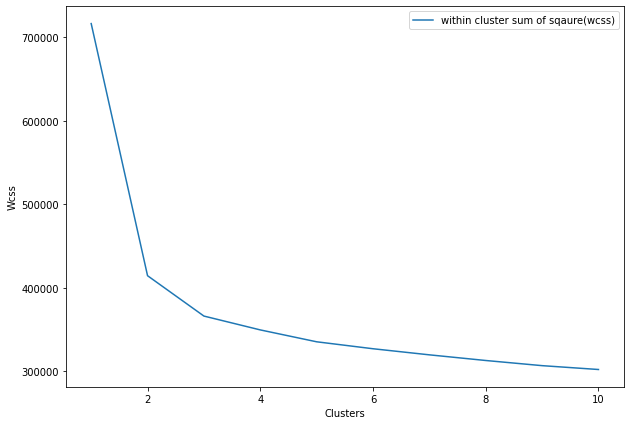

([716374.7494000001,
  414472.148261891,
  366150.81211965025,
  349574.40193543985,
  335345.7392407465,
  327021.4985551928,
  319721.7295356083,
  312949.26885976683,
  306780.46421037207,
  302164.83278759394],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [ ]:
plt.figure(figsize = [10,7])
myKmeans(data=cust2, k=10, gap=1, verbose=True)

In [ ]:
#n_clusters = 2

km=KMeans(n_clusters=2)
km_result=km.fit(cust2)

km_result.labels_

array([1, 0, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
cust2

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_M,Gender_Other
0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
29996,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
29997,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
29998,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


In [ ]:
cust4=cust2.copy()

cust4["cluster2"]=km_result.labels_
cust4.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_M,Gender_Other,cluster2
0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1
1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,1
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,1,1


In [ ]:
cust4["cluster2"].value_counts()

0    16823
1    13177
Name: cluster2, dtype: int64

In [ ]:
clust2=cust4.groupby(["cluster2"]).mean().T
clust2.columns=["clust1", "clust2"]
clust2.reset_index(inplace=True)
clust2

,index,clust1,clust2
0,Orders,1.362718,7.753586
1,Jordan,0.241396,0.267663
2,Gatorade,0.222493,0.254686
3,Samsung,0.194555,0.214996
4,Asus,0.133686,0.155195
5,Udis,0.120133,0.128178
6,Mondelez International,0.123046,0.128254
7,Wrangler,0.094930,0.099036
8,Vans,0.085181,0.091599
9,Fila,0.082982,0.079229


In [ ]:
overall=pd.DataFrame(cust2.describe().T["mean"])
overall.reset_index(inplace=True)
overall.columns=["index", "Overall_mean"]

In [ ]:

final2=overall.merge(clust2, on="index", how="inner")
final2

,index,Overall_mean,clust1,clust2
0,Orders,4.169800,1.362718,7.753586
1,Jordan,0.252933,0.241396,0.267663
2,Gatorade,0.236633,0.222493,0.254686
3,Samsung,0.203533,0.194555,0.214996
4,Asus,0.143133,0.133686,0.155195
5,Udis,0.123667,0.120133,0.128178
6,Mondelez International,0.125333,0.123046,0.128254
7,Wrangler,0.096733,0.094930,0.099036
8,Vans,0.088000,0.085181,0.091599
9,Fila,0.081333,0.082982,0.079229


# Silhouette score 

In [ ]:
score1 = metrics.silhouette_score(cust2, km_result.labels_)
print('Silhouette Score : % 0.3f' % score1)

Silhouette Score :  0.364


In [ ]:
cust4.columns

Index(['Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft', 'Gender_M',
       'Gender_Other', 'cluster2'],
      dtype='object')

In [ ]:
final2.to_excel("Clustering_1.xlsx" )

In [ ]:
#Silhouette Analysis

! pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


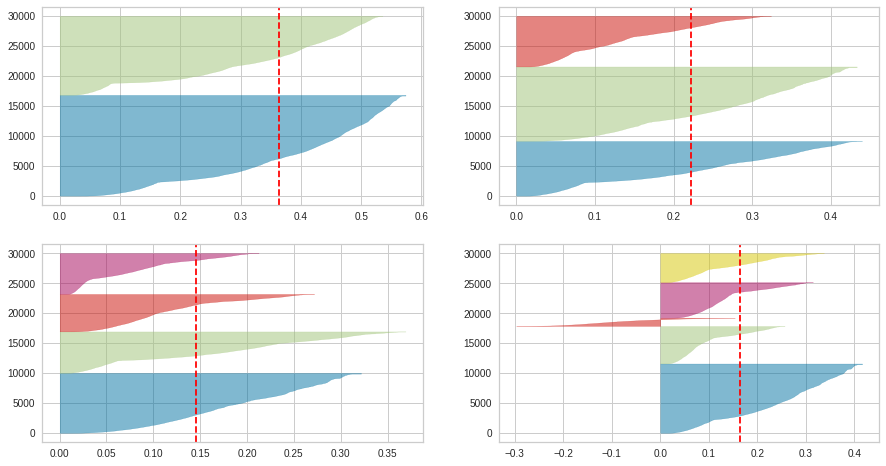

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(cust2) 


In [ ]:
#n_clusters = 3

km=KMeans(n_clusters=3)
km_result=km.fit(cust2)


km_result.labels_

array([1, 2, 1, ..., 2, 2, 0], dtype=int32)

In [ ]:
cust5=cust2.copy()
cust5["cluster3"]=km_result.labels_
cust5["cluster3"].value_counts()

2    12432
1     9128
0     8440
Name: cluster3, dtype: int64

In [ ]:
clust3=cust5.groupby(["cluster3"]).mean().T
clust3.columns=["clust1", "clust2", "clust3"]
clust3.reset_index(inplace=True)
clust3


,index,clust1,clust2,clust3
0,Orders,4.460782,8.751643,0.608108
1,Jordan,0.269076,0.264351,0.233591
2,Gatorade,0.260545,0.253615,0.207931
3,Samsung,0.222512,0.210232,0.185730
4,Asus,0.150948,0.155237,0.128941
5,Udis,0.127962,0.127739,0.117761
6,Mondelez International,0.131280,0.127410,0.119772
7,Wrangler,0.100829,0.098160,0.092905
8,Vans,0.091114,0.090162,0.084299
9,Fila,0.079384,0.077673,0.085344


In [ ]:
final3=overall.merge(clust3, on="index", how="inner")
final3

,index,Overall_mean,clust1,clust2,clust3
0,Orders,4.169800,4.460782,8.751643,0.608108
1,Jordan,0.252933,0.269076,0.264351,0.233591
2,Gatorade,0.236633,0.260545,0.253615,0.207931
3,Samsung,0.203533,0.222512,0.210232,0.185730
4,Asus,0.143133,0.150948,0.155237,0.128941
5,Udis,0.123667,0.127962,0.127739,0.117761
6,Mondelez International,0.125333,0.131280,0.127410,0.119772
7,Wrangler,0.096733,0.100829,0.098160,0.092905
8,Vans,0.088000,0.091114,0.090162,0.084299
9,Fila,0.081333,0.079384,0.077673,0.085344


In [ ]:
# Silhouette score 
score2 = metrics.silhouette_score(cust2, km_result.labels_)
print('Silhouette Score : % 0.3f' % score2)

Silhouette Score :  0.222


In [ ]:
final3.to_excel("Clustering_2.xlsx" )


In [ ]:
#n_clusters = 4

km=KMeans(n_clusters=4)
km_result=km.fit(cust2)

km_result.labels_


array([1, 2, 1, ..., 2, 2, 3], dtype=int32)

In [ ]:
cust6=cust2.copy()
cust6["cluster4"]=km_result.labels_
cust6["cluster4"].value_counts()

2    10010
0     6921
3     6813
1     6256
Name: cluster4, dtype: int64

In [ ]:
clust4=cust6.groupby(["cluster4"]).mean().T
clust4.columns=["clust1", "clust2", "clust3", "clust4"]
clust4.reset_index(inplace=True)
clust4

,index,clust1,clust2,clust3,clust4
0,Orders,9.310215,6.031490,0.271329,2.966241
1,Jordan,0.255599,0.281010,0.222078,0.269778
2,Gatorade,0.259645,0.249201,0.198901,0.257155
3,Samsung,0.213842,0.216272,0.178322,0.218406
4,Asus,0.152290,0.158408,0.127373,0.142962
5,Udis,0.124837,0.131873,0.112887,0.130779
6,Mondelez International,0.128883,0.127558,0.116184,0.133128
7,Wrangler,0.097385,0.100863,0.090010,0.102158
8,Vans,0.088282,0.095269,0.081518,0.090562
9,Fila,0.078023,0.080563,0.086214,0.078233


In [ ]:
final4=overall.merge(clust4, on="index", how="inner")
final4

,index,Overall_mean,clust1,clust2,clust3,clust4
0,Orders,4.169800,9.310215,6.031490,0.271329,2.966241
1,Jordan,0.252933,0.255599,0.281010,0.222078,0.269778
2,Gatorade,0.236633,0.259645,0.249201,0.198901,0.257155
3,Samsung,0.203533,0.213842,0.216272,0.178322,0.218406
4,Asus,0.143133,0.152290,0.158408,0.127373,0.142962
5,Udis,0.123667,0.124837,0.131873,0.112887,0.130779
6,Mondelez International,0.125333,0.128883,0.127558,0.116184,0.133128
7,Wrangler,0.096733,0.097385,0.100863,0.090010,0.102158
8,Vans,0.088000,0.088282,0.095269,0.081518,0.090562
9,Fila,0.081333,0.078023,0.080563,0.086214,0.078233


In [ ]:
# Silhouette score 
score3 = metrics.silhouette_score(cust2, km_result.labels_)
print('Silhouette Score : % 0.3f' % score3)


Silhouette Score :  0.145


In [ ]:
final4.to_excel("Clustering_3.xlsx" )

The value of Silhouette score varies from -1 to 1. If the score is 1, the cluster is dense and well-separated than other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighbouring clusters. A negative score [-1, 0] indicate that the samples might have got assigned to the wrong clusters.

As a  conclusion analysed Segmentation of customer based on the optimum number of clusters (‘k’)
with the help of silhouette score